# TP3 : Detection de contours
L'objectif de ce TP est double : d'une part comprendre le principe de la détection de contours en implémentant votre propre détecteur de Canny puis ensuite il s'agira de comparer les différents algorithmes présents dans OpenCV. Enfin, on s'intéressera à la détection de lignes dans des images de route.


## Exercice 1 : Votre propre détecteur de Canny

Il s'agira d'implémenter les étapes suivantes :
 + Lissage par un filtre gaussien.
 + Calcul des gradients.
 + Supression des non-maxima.
 + Seuillage.
 + Seuillage par hysterésis.
 
### Ouvrir une image

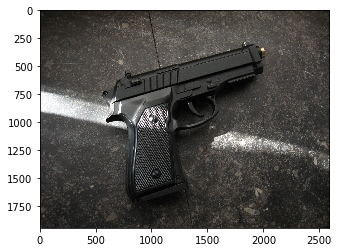

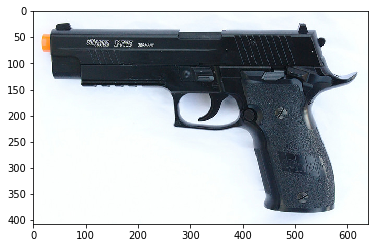

In [112]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

# TO COMPLETE

# open an image from a file
def open(img, gray=False):
    if gray:
        img = cv2.imread(img,0)
        plt.imshow(img,interpolation='nearest', cmap='gray')

    else:
        img = cv2.imread(img,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img,interpolation='nearest')

    plt.show()
    return img

PF = '/Users/simon/python/projet_osy/models/research/object_detection/trainset_guns/images/'
img = open(PF+'handgun_1.jpeg')
img8 = open(PF+'handgun_8.jpeg')

### Lissage par un filtre gaussien

Ouvrir une image et convoluer cette image par un filtre gaussien de taille de noyau 3 et avec $\sigma=1$. Vous pourrez pour cela utiliser la fonction **GaussianBlur** d'OpenCV : documentation [ici](https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html)


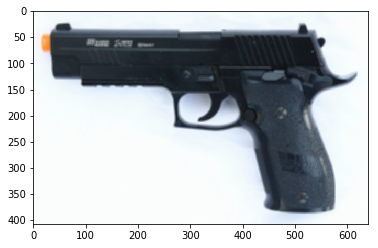

In [48]:
# creation du noyau gaussien manuellement
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img8,-1,kernel)
plt.imshow(dst)

# application de la fonction GaussianBlur
blur = cv2.GaussianBlur(img8,(5,5), 5)
plt.imshow(blur)

Tester avec différentes tailles de noyau et différentes valeurs de $\sigma$. Afficher l'image originale et l'image filtrée

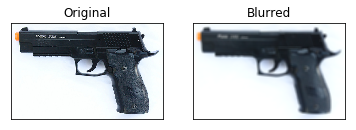

In [63]:
kernel_size = 13
sigma = 10

# TO COMPLETE
blur = cv2.GaussianBlur(img8,(kernel_size, kernel_size), sigma)

plt.subplot(121),plt.imshow(img8),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Calcul des gradients

Vous avez ici deux possibilités :
+ Utiliser les fonctions d'OpenCV et notamment le filtre de Sobel sur l'image d'origine.
+ Proposer vos propres filtres approximant les dérivées premières et les appliquer aux images précedemment lissées

Documentation [ici](https://docs.opencv.org/3.2.0/d5/d0f/tutorial_py_gradients.html)


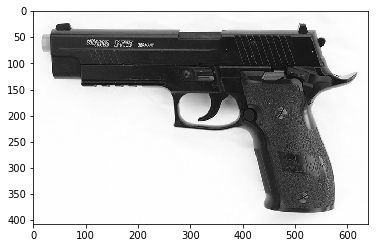

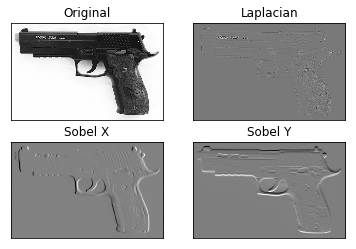

In [70]:
# TO COMPLETE
img = open(PF+'handgun_8.jpeg', True)
kernel_size = 13
sigma = 10

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=kernel_size)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=kernel_size)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

###  Suppression des non-maxima

Le principe (par discretisation de la direction) est le suivant :
 + Arrondir la direction du gradient avec un voisinage de 8 (plus proche 45 degré)
 + Comparer la force du gradient du pixel courant avec celle qui se trouve dans la direction arrondie positive et négative du gradient.
 + Conserver le pixel si sa force est plus grande que ses deux voisins dans la direction du gradient.



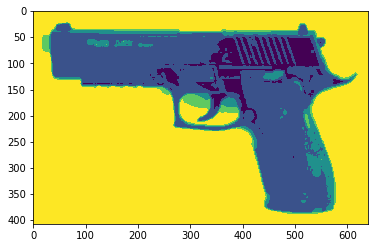

In [98]:
# TO COMPLETE
# se montre mieux en couleur

kernel = np.ones((5,5),np.float32)/1500
dst = cv2.filter2D(img8,-1,kernel)
plt.imshow(dst)


### Seuillage

Le detecteur de Canny utilise un double seuillage. Les pixels dont la force du contour est au dessus d'un premier seuil (seuil haut) sont conservés. Les pixels dont la force du contour est en dessous du deuxième seuil (seuil bas) sont supprimés. Les pixels restant sont considérés comme pixels faibles.  Mettre en oeuvre ce principe.


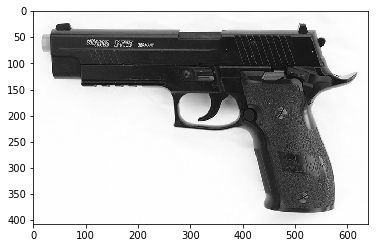

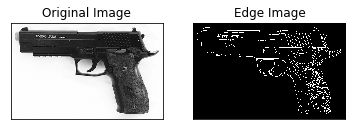

In [79]:
# TO COMPLETE
img = open(PF+'handgun_8.jpeg', True)

low_threshold = 100
high_threshold = 150

edges = cv2.Canny(img,low_threshold, high_threshold)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Seuillage par hysterésis

Le principe consiste à ne garder que les pixels faibles qui sont dans le voisinage de pixels forts. Mettre en oeuvre ce principe avec une taille de voisinage pouvant se paramétrer.


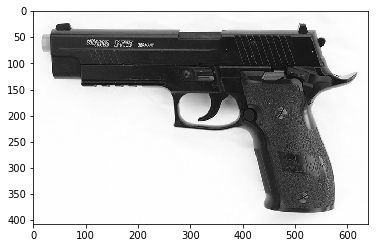

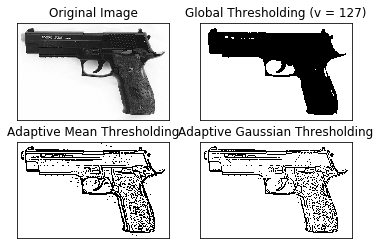

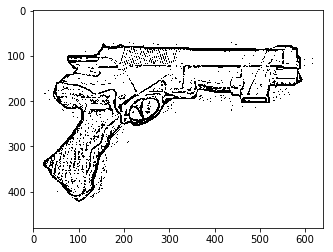

In [172]:
# TO COMPLETE
import time

img = open(PF+'handgun_8.jpeg', True)

blur = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(blur,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()



def hysteresis(img):
    blur = cv2.medianBlur(img,5)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
    plt.imshow(th3, cmap = 'gray')


i=41
title = PF+'handgun_'+str(i)+'.jpeg'
img = cv2.imread(title,0)
plt.imshow(img,interpolation='nearest', cmap='gray')
hysteresis(img)



### Detecteur de Canny 

Tester votre détecteur de Canny ainsi créé sur plusieurs images. Comparer le avec celui implémenté dans OpenCV : [ici](https://docs.opencv.org/3.3.1/da/d22/tutorial_py_canny.html).

## Exercice 2 : Comparaison d'approches de detection de contours

L'objectif de cet exercice est de comparer différents algorithmes de détection de contours.
Plusieurs algorithmes sont présents pour la détection de contours dans OpenCV : *Sobel*, *Scharr*, *Laplacian* et *Canny*. La documentation utile est disponible [ici](http://docs.opencv.org/3.2.0/da/d22/tutorial_py_canny.html) et [ici](http://docs.opencv.org/3.2.0/d5/d0f/tutorial_py_gradients.html).

Vous allez faire une comparaison de 3 détecteurs de contours (Sobel, Laplace, Canny) avec 10 images différentes disponibles dans le répertoire Data. Ces images proviennent de la [base d'images de Berkeley](http://www.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/dataset/images.html) qui contient la vérité terrain (segmentation manuelle des contours par des humains). Vous pouvez augmenter le nombre d'images du jeu de données de test en récupérant d'autres images et leur vérité terrain en parcourant le jeu de données en ligne.

Ecrire un programme permettant d'apppliquer les différents détecteurs de contour sur les images de votre base de test/


In [5]:
# TO COMPLETE

Cette étape consiste en la comparaison d'une image de contours avec la référence tracée à la main en utilisant 5 grandeurs :
+ **contours-detectes** = nombre de pixels contours dans l'image calculée.
+ **contours-reference** = nombre de pixels contours dans l'image de référence.
+ **contours-correc** = nombre de pixels contours correctement détectés dans l'image calculée selon l'image référence. 
Pour cette grandeur, il faudrait tenir compte d'un décalage possible entre les images. On négligera ce décalage ici.
+ **faux-positifs** = nombre de pixels détectés comme contours mais qui ne le sont pas dans l'image de référence.
+ **faux-negatifs** = nombre de pixels non détectés comme contours.

Ecrire le code permettant de calculer ces grandeurs étant données une image de contours et sa vérité terrain.


In [6]:
# TO COMPLETE

 En déduire les trois mesures suivantes pour évaluer les détecteurs :
+  **P**=**contours-correc}** / (**contours-correc**+ **faux-positifs**+**faux-negatifs**)
+  **TFP*** = **faux-positifs** / (**contours-correc**+ **faux-positifs** +**faux-negatifs**)
+ **TFN** = **faux-negatifs** / (**contours-correc**+ **faux-positifs** +**faux-negatifs**)

Ecrire le code permettant de calculer ces mesures et calculer les sur la base de test. Discuter des résultats.



In [ ]:
# TO COMPLETE

## Exercice 3 : Détection de lignes
L'objectif de cet exercice est de tester l'approche de détection de lignes droites dans des images à l'aide du détecteur de contours et de la transformée de Hough. 
Le principe sera le suivant :
+ Détection des contours avec le meilleur détecteur à votre disposition (c.f. exercice 2).
+ Extraire les regions d'intérêts dans des images (dans les images à votre disposition les droites recherches sont dans la moitié basse de l'image et il est donc possible de définir un masque.
+ Appliquer la transformée de Hough pour la détection de droites.


Charger l'image **road.jpg** (repertoire Data/LAB3) ci dessous et appliquer un détecteur de contours.
![road.jpg](./Data/LAB3/road.jpg)

In [ ]:
# TO COMPLETE

Restreindre la detection des contours et des droites à la moitié basse de l'image en définissant un masque et donc une region d'intérêt.

In [7]:
# TO COMPLETE

Appliquer la detection de contours sur cette région d'intérêt. Visualiser l'image résultat

In [8]:
# TO COMPLETE

Détecter les droites à l'aide de la fonction **cv2.HoughLines** d'openCV. Une documentation est disponible [ici](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html)

In [9]:
# TO COMPLETE

Tester votre chaîne algorithmique sur d'autres images.

In [ ]:
# TO COMPLETE